In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# ESTUDIO DE SALUD MENTAL

##  Paso1: Importado de datos


In [2]:
df=pd.read_csv("Data/1- mental-illnesses-prevalence.csv")
df.head(20)
#Este es el formato del dataframe

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723


In [3]:
#Este estudio tiene como año más reciente 2019
anio = df["Year"].max()
#Si no te sirve ignoralo xd
print(anio)

2019


## Paso 2: Limpieza de Datos

In [4]:
#datos sin nulos ni duplicados
df = df.dropna()
df = df.drop_duplicates()

## Paso 3.1: Análisis Compartido

### Pasos para usar combinar esta DataFrame con otro

#### 3.1.1. Identificación de Entidades (paises) estudiadas en este DataFrame

In [5]:
#Aquí te voy a poner cuales son todas las Entidades (paises y más) que este Dataframe abarca con sus nombres especificos
entidades = df["Entity"].unique()
print(entidades)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Isr

#### 3.1.2. Paises europeos estudiados

In [6]:
#Te ahorro el trabajo y te hago un array de los paises Europeos que existen
TODOS_LOS_PAISES_DE_EUROPA = ["Albania", "Andorra", "Austria", "Belarus", "Belgium",
"Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
"Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
"Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania",
"Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands",
"North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia",
"San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
"Switzerland", "Ukraine", "United Kingdom", "Vatican City", "Europe Union (27)"] #Te meto también la Entidad de Union Europea que tiene

#Este Dataframe ya tiene todos los datos solo de los europeos
df_europeos = df[df["Entity"].isin(TODOS_LOS_PAISES_DE_EUROPA)]

EUROPEOS = df_europeos["Entity"].unique()
#Estos son los PAISES EUROPEOS que si están en el dataframe
print(EUROPEOS)

['Albania' 'Andorra' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova'
 'Monaco' 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russia' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Ukraine' 'United Kingdom']


# 3.1.3. Comandos de ayuda para mis compañeros

In [7]:
#Importante, os lo dejo preparado ya:
#1. Si quieres sacar TUS paises y almacenarlos en un array, usa este comando: misPaises = TU_DATAFRAME["Columna donde salgan tus paises"].unique()
#2. Si quieres quedarte De ESTE DATAFRAME solo con TUS paises usa: df_personalizado =df[df["Entity"].isin(misPaises)]
#3. Si no te funciona haz un array a mano de los paises que quieres comparar y lo sustituyes por misPaises y recuerda que están en inglés
#4. Si quieres sacar los paises europeos de TU DATAFRAME que ya están en ESTE DATAFRAME usa: df_perfe =TU_DATAFRAME["Columna donde salgan tus paises"].isin(EUROPEOS)]
#5. Si quieres usar solo los datos del ultimo año (2019): anio_mas_reciente = df_europeos["Year"].max() y luego: df_europeos_reciente = df_europeos[df_europeos["Year"] == anio_mas_reciente]

## 3.2 Análisis específico

### 3.2.1 ANÁLISIS DE ESPAÑA EN COMPARACIÓN DE EUROPA

In [8]:
trastornos = [
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized"
]

df_media_europa = (
    df_europeos
    .groupby("Year")[trastornos]
    .mean()
    .reset_index()
)

In [9]:
df_media_long = df_media_europa.melt(
    id_vars="Year",
    value_vars=trastornos,
    var_name="Disorder",
    value_name="Share"
)

df_media_long["Disorder"] = df_media_long["Disorder"].str.split(" \\(").str[0]

In [10]:
df_spain = df[df["Entity"] == "Spain"]

In [11]:
df_spain_long = df_spain.melt(
    id_vars="Year",
    value_vars=trastornos,
    var_name="Disorder",
    value_name="Share"
)

df_spain_long["Disorder"] = df_spain_long["Disorder"].str.split(" \\(").str[0]

### 3.2.2 TOP 5 PAISES EUROPEOS POR TRASTORNO 

In [12]:
#Para este estudio solo quiero los años más recientes
anio_mas_reciente = df_europeos["Year"].max()
print(anio_mas_reciente)

2019


In [13]:
df_europeos_reciente = df_europeos[df_europeos["Year"] == anio_mas_reciente]

In [14]:
trastornos = {
    "Schizophrenia": "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Depression": "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Anxiety": "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Bipolar": "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Eating": "Eating disorders (share of population) - Sex: Both - Age: Age-standardized"
}

In [15]:
#DEPRESIÓN
top_depression = (
    df_europeos_reciente[["Entity", trastornos["Depression"]]]
    .sort_values(by=trastornos["Depression"], ascending=False)
    .head(5)
)
print(top_depression)

        Entity  \
2279    Greece   
5399     Spain   
4649  Portugal   
2789   Ireland   
2069   Finland   

      Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  
2279                                           5.042251                               
5399                                           4.704455                               
4649                                           4.394066                               
2789                                           4.216931                               
2069                                           4.139295                               


In [16]:
#ANSIEDAD
top_anxiety = (
    df_europeos_reciente[["Entity", trastornos["Anxiety"]]]
    .sort_values(by=trastornos["Anxiety"], ascending=False)
    .head(5)
)
print(top_anxiety)

           Entity  \
4649     Portugal   
2789      Ireland   
5549  Switzerland   
4049  Netherlands   
4319       Norway   

      Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  
4649                                           8.027610                            
2789                                           6.907819                            
5549                                           6.790610                            
4049                                           6.754801                            
4319                                           6.735841                            


In [17]:
#ESQUIZOFRENIA
top_schizophrenia = (
    df_europeos_reciente[["Entity", trastornos["Schizophrenia"]]]
    .sort_values(by=trastornos["Schizophrenia"], ascending=False)
    .head(5)
)
print(top_schizophrenia)

           Entity  \
4049  Netherlands   
2789      Ireland   
5219     Slovenia   
5189     Slovakia   
3779       Monaco   

      Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  
4049                                           0.367969                                  
2789                                           0.352672                                  
5219                                           0.299507                                  
5189                                           0.295679                                  
3779                                           0.295402                                  


In [18]:
#BIPOLARIDAD
top_bipolar = (
    df_europeos_reciente[["Entity", trastornos["Bipolar"]]]
    .sort_values(by=trastornos["Bipolar"], ascending=False)
    .head(5)
)
print(top_bipolar)

              Entity  \
6059  United Kingdom   
5519          Sweden   
5549     Switzerland   
1589         Denmark   
209          Andorra   

      Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  
6059                                           1.094477                            
5519                                           0.973931                            
5549                                           0.941743                            
1589                                           0.940294                            
209                                            0.934813                            


In [19]:
#TRASTORNO ALIMENTICIO
top_eating = (
    df_europeos_reciente[["Entity", trastornos["Eating"]]]
    .sort_values(by=trastornos["Eating"], ascending=False)
    .head(5)
)
print(top_eating)

          Entity  \
3779      Monaco   
5399       Spain   
3389  Luxembourg   
419      Austria   
2849       Italy   

      Eating disorders (share of population) - Sex: Both - Age: Age-standardized  
3779                                           0.869913                           
5399                                           0.590252                           
3389                                           0.568823                           
419                                            0.562230                           
2849                                           0.544489                           


### 3.2.3 Evolución de trastornos de ansiedad y depresión

In [20]:
top5_anxiety_countries = top_anxiety["Entity"].tolist()
top5_depression_countries = top_depression["Entity"].tolist()

In [21]:
df_anxiety_evolution = df_europeos[
    df_europeos["Entity"].isin(top5_anxiety_countries)
]

df_depression_evolution = df_europeos[
    df_europeos["Entity"].isin(top5_depression_countries)
]

## Paso 4: Comunicacion de Datos y Visualización

## 4.1 EVOLUCION DE EUROPA Y COMPARACIÓN CON ESPAÑA

<Axes: xlabel='Year', ylabel='Share'>

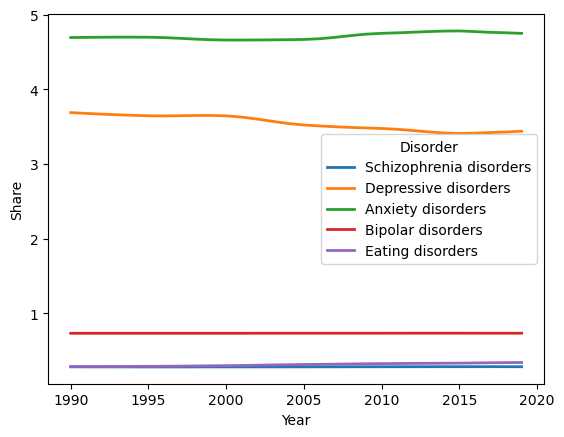

In [22]:
sns.lineplot(
    data=df_media_long,
    x="Year",
    y="Share",
    hue="Disorder",
    linewidth=2
)

<Axes: xlabel='Year', ylabel='Share'>

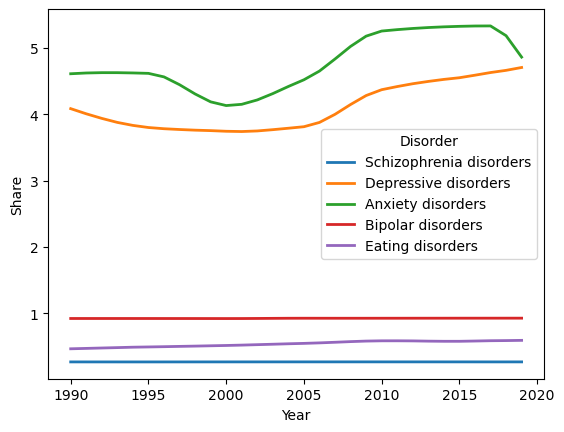

In [23]:
sns.lineplot(
    data=df_spain_long,
    x="Year",
    y="Share",
    hue="Disorder",
    linewidth=2
)

## 4.2 TOP PAISES EUROPEOS POR TRASTORNO

In [24]:
colors = {
    "Schizophrenia": "steelblue",
    "Depression": "indianred",
    "Anxiety": "goldenrod",
    "Bipolar": "mediumseagreen",
    "Eating": "mediumpurple"
}

Text(0.5, 1.0, 'TOP 5 países europeos – Esquizofrenia')

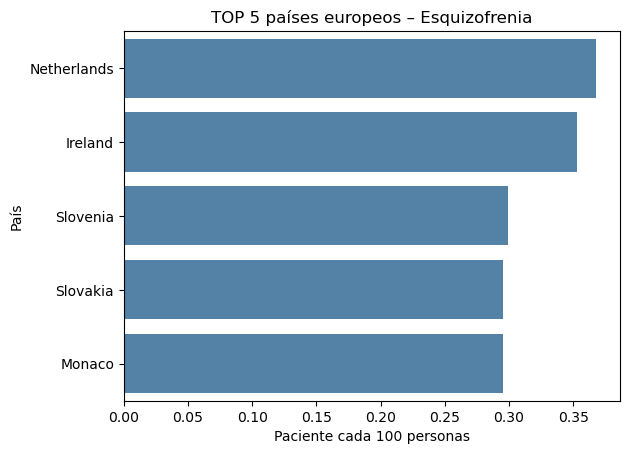

In [25]:
ax = sns.barplot(
    data=top_schizophrenia,
    x="Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized",
    y="Entity",
    color=colors["Schizophrenia"]
)
ax.set_xlabel("Paciente cada 100 personas")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Esquizofrenia")


Text(0.5, 1.0, 'TOP 5 países europeos – Depresión')

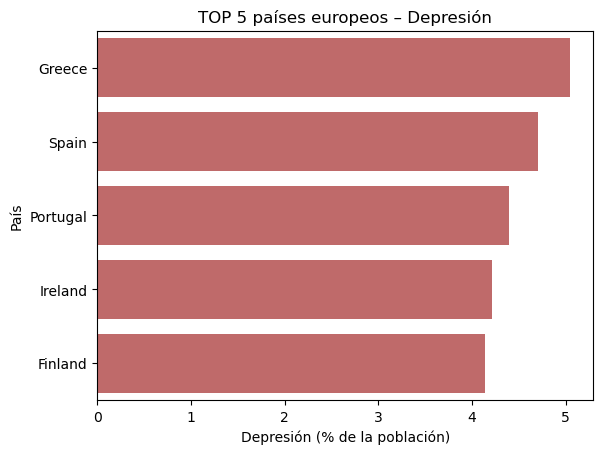

In [26]:
ax = sns.barplot(
    data=top_depression,
    x="Depressive disorders (share of population) - Sex: Both - Age: Age-standardized",
    y="Entity",
    color=colors["Depression"]
)
ax.set_xlabel("Depresión (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Depresión")

Text(0.5, 1.0, 'TOP 5 países europeos – Ansiedad')

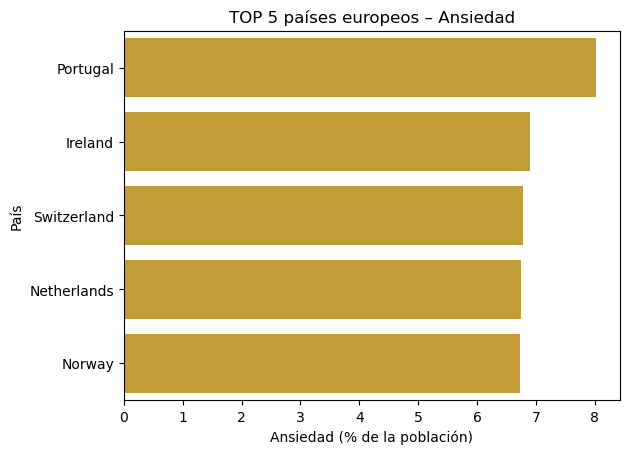

In [27]:
ax = sns.barplot(
    data=top_anxiety,
    x="Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
    y="Entity",
    color=colors["Anxiety"]
)
ax.set_xlabel("Ansiedad (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Ansiedad")

Text(0.5, 1.0, 'TOP 5 países europeos – Trastorno bipolar')

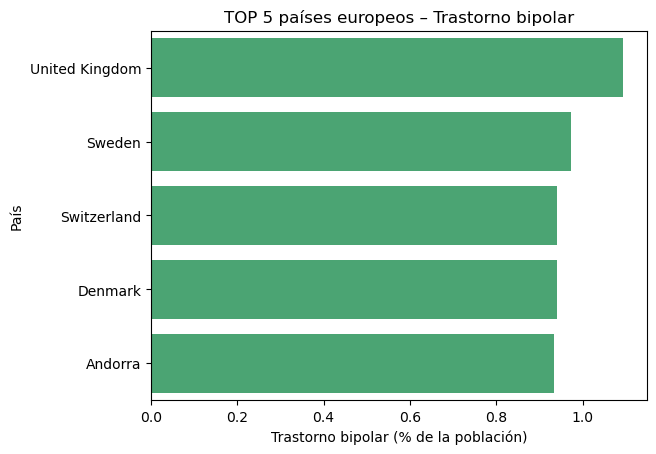

In [28]:
ax = sns.barplot(
    data=top_bipolar,
    x="Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized",
    y="Entity",
    color=colors["Bipolar"]
)
ax.set_xlabel("Trastorno bipolar (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Trastorno bipolar")

Text(0.5, 1.0, 'TOP 5 países europeos – Trastornos alimentarios')

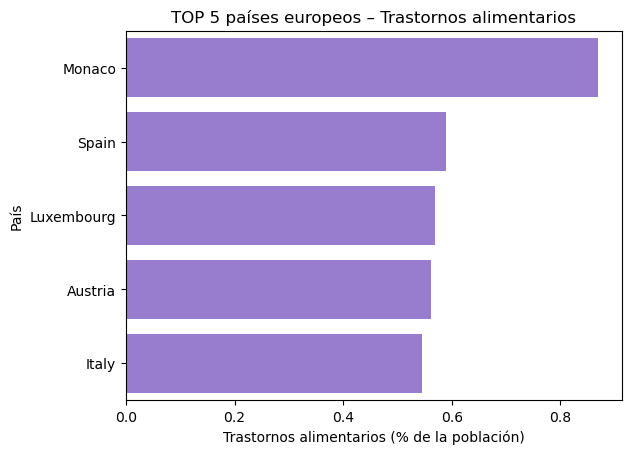

In [29]:
ax = sns.barplot(
    data=top_eating,
    x="Eating disorders (share of population) - Sex: Both - Age: Age-standardized",
    y="Entity",
    color=colors["Eating"]
)
ax.set_xlabel("Trastornos alimentarios (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Trastornos alimentarios")

## 4.2 EVOLUCIÓN DE ANSIEDAD Y DEPRESIÓN EN TOP PAISES

Text(0.5, 1.0, 'Anxiety evolution – TOP 5 European countries')

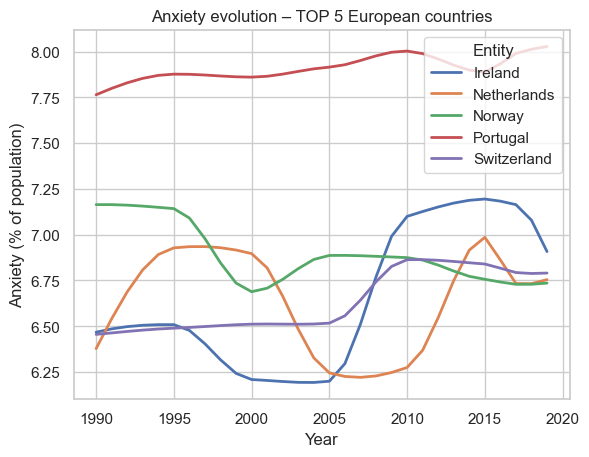

In [30]:
sns.set_theme(style="whitegrid")

ax = sns.lineplot(
    data=df_anxiety_evolution,
    x="Year",
    y="Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
    hue="Entity",
    linewidth=2
)

ax.set_ylabel("Anxiety (% of population)")
ax.set_xlabel("Year")
ax.set_title("Anxiety evolution – TOP 5 European countries")

Text(0.5, 1.0, 'Depression evolution – TOP 5 European countries')

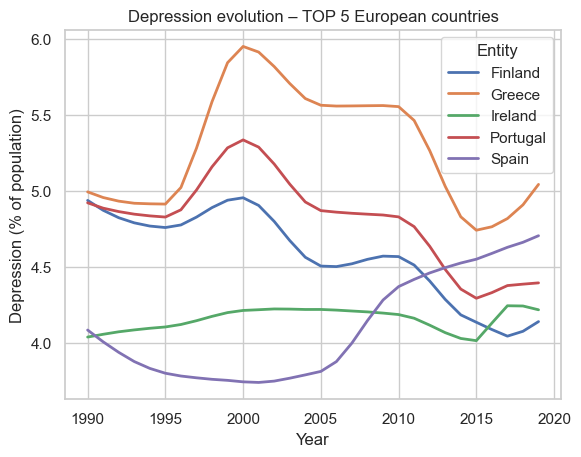

In [31]:
ax = sns.lineplot(
    data=df_depression_evolution,
    x="Year",
    y="Depressive disorders (share of population) - Sex: Both - Age: Age-standardized",
    hue="Entity",
    linewidth=2
)

ax.set_ylabel("Depression (% of population)")
ax.set_xlabel("Year")
ax.set_title("Depression evolution – TOP 5 European countries")